In [12]:
import sys; sys.path.insert(0, '..')
from database.dataset import *
import pyforest

In [13]:
def easy_plot(i):
    plt.figure()
    plt.imshow(db[i]['img'], cmap='gray' )
    plt.imshow(db[i]['lesion_mask'])
    plt.axis('off')
    plt.show()

In [14]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='image',
        max_lesion_size_mm=1.0,
        extract_patches=True,
        extract_patches_method='all',  # 'centered'
        patch_size=256,
        stride=256,
        min_breast_fraction_roi=0.5,
        normalize=None,
        n_jobs=-1,
)

In [15]:
db.df.loc[0]

img_id                                                      20586908
n_rois                                                            42
side                                                               R
view                                                              CC
filename           /home/vzalevskyi/projects/calc-det/data/INbrea...
acr                                                                2
artifact                                                       False
birads                                                             2
case_id                                             6c613a14b80a8591
finding_notes                           nodulo mama direita + micros
lesion_annot                                                     yes
pectoral_muscle                                                False
mass                                                            True
micros                                                          True
distortion                        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

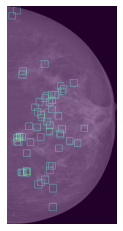

In [16]:
roi_mask = np.zeros(db[1]['img'].shape)
for i in db[1]['lesion_bboxes']:
    roi_mask = cv2.rectangle(roi_mask, (i[0][0]-50, i[0][1]-50), (i[1][0]+50, i[1][1]+50), 255, 3)
plt.figure()
plt.imshow(db[1]['img'], cmap='gray' )
plt.imshow(roi_mask, alpha=0.5)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

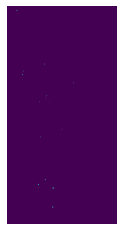

In [6]:
easy_plot(1)

In [9]:
db =  INBreast_Dataset(
        return_lesions_mask=True,
        level='rois',
        max_lesion_size_mm=1.0,
        extract_patches=True,
        extract_patches_method='all',  # 'centered'
        patch_size=512,
        stride=256,
        min_breast_fraction_roi=0.5,
        normalize=None,
        n_jobs=-1)

100%|██████████| 310/310 [01:12<00:00,  4.27it/s]


In [10]:
# db.df.loc[db.df.img_id==22614499]

In [ ]:
for i in range(300):
    if db[i]['lab'] == 'abnormal':
        easy_plot(i)

In [42]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='rois',
        max_lesion_size_mm=1.0,
        extract_rois=False,
        extract_rois_method='all',  # 'centered'
        roi_size=256,
        stride=256,
        min_breast_fraction_roi=0.8,
        normalize=None,
        n_jobs=-1,
)